<a href="https://colab.research.google.com/github/cho-jr/2020_cphys2/blob/master/hw8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (Xtest, y_test) = fashion_mnist.load_data()

In [149]:
X.shape

(60000, 28, 28)

(9, <matplotlib.image.AxesImage at 0x7f8c5c3794e0>)

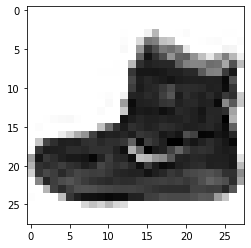

In [150]:
y[0], plt.imshow(X[0], cmap=plt.cm.binary)

(0, <matplotlib.image.AxesImage at 0x7f8c5c3f6ac8>)

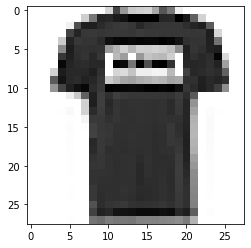

In [151]:
y[1], plt.imshow(X[1], cmap=plt.cm.binary)

In [152]:
# 모델 만들기

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dropout(0.3))
net.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
net.add(layers.Dropout(0.3))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])


In [153]:
# 데이터 정리
y_train = to_categorical(y)
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

y_test = to_categorical(y_test)

X_train = X.reshape((60000, 28*28))
X_train = X_train/255
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

X_test = Xtest.reshape((10000, 28*28))
X_test = X_test/255


In [154]:
net.fit(X_train, y_train, 
        epochs=10, 
        batch_size=128, 
        )

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.6109 - accuracy: 0.7838
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.4307 - accuracy: 0.8434
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3850 - accuracy: 0.8614
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3599 - accuracy: 0.8700
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3445 - accuracy: 0.8752
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3287 - accuracy: 0.8805
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3158 - accuracy: 0.8851
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3053 - accuracy: 0.8891
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3001 - accuracy: 0.8899
Epoch 10/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2925 - accura

In [155]:
net.fit(partial_X_train, partial_y_train, 
        epochs=10, 
        batch_size=64, 
        validation_data=(X_val, y_val))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3249 - accuracy: 0.8803 - val_loss: 0.2674 - val_accuracy: 0.9000
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3093 - accuracy: 0.8874 - val_loss: 0.2813 - val_accuracy: 0.8960
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2993 - accuracy: 0.8908 - val_loss: 0.2698 - val_accuracy: 0.8969
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2932 - accuracy: 0.8925 - val_loss: 0.2560 - val_accuracy: 0.9048
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2832 - accuracy: 0.8946 - val_loss: 0.2572 - val_accuracy: 0.9039
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2749 - accuracy: 0.8980 - val_loss: 0.2570 - val_accuracy: 0.9006
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2736 - accuracy: 0.8989 - val_loss: 0.2555 - val_accuracy: 0.9018
Epoch 

In [156]:
test_loss, test_acc = net.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.8894


In [157]:
net.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


Ankle boot


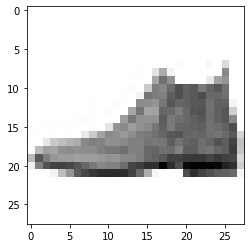

Pullover


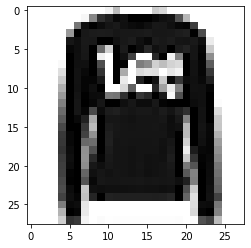

Trouser


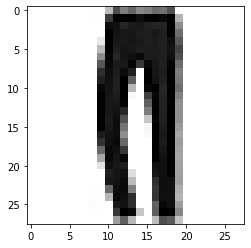

Trouser


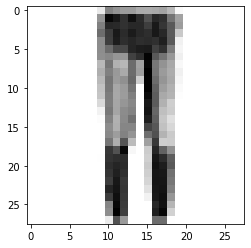

Shirt


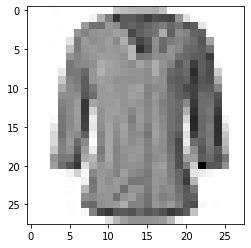

Trouser


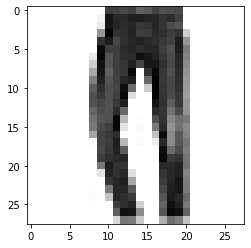

Coat


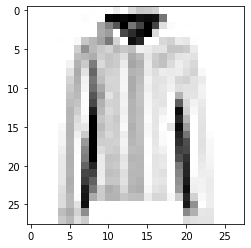

Shirt


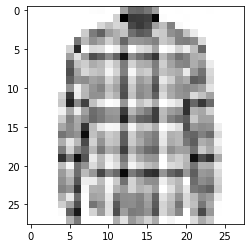

Sandal


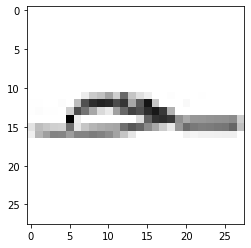

Sneaker


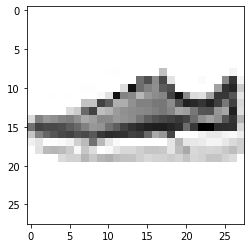

In [174]:
name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
        'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(10):
  print(name[np.argmax(net.predict(X_test)[i])])
  plt.imshow(Xtest[i], cmap=plt.cm.binary)
  plt.show()

짧은 보고서
validation과 Dropout까지 적용해봤다. 숫자 mnist와 같은 방법으로 했을 때는 정확도가 0.7에 못미쳤지만 위 방법을 적용하고 변수를 조절해본 결과 테스트 정확도가 0.88에 육박하는 쾌거를 이룩하였다. 모델을 가지고 테스트 데이터 일부를 예측하는 모습을 확인해보았다. 눈으로도 구분하기 힘든 사진을 잘 구분한 것을 볼 수 있었다. 